# Exploration des données de l'entreprise Sell4All :

# Réalisé par Abdellah Badou

# Introduction :

Cette base de données contient des informations sur les utilisateurs (clients), et leurs dépenses sur le site Web de Sell4All. Avec 505 lignes et 11 colonnes.

Importation des bibliothèques :

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Informations sur les 5 premières lignes du fichier CSV :

In [4]:
Sell4All_data = pd.read_csv('dataset-sell4all.csv')
Sell4All_data.head(5)

,Name,Phone Number,Email,Address,Country,Postal code,Last date of connection,Last time of connection,Age,Gender,Customer spendings
0,Aaron Cote,966-7625,elit@hotmail.org,699-5837 Risus Street,Norway,4126,5-Apr-21,4:39,71,Man,356
1,Angelica Lawson,232-3051,diam.proin@google.org,481-8428 Magna. Street,Pakistan,518885,"oct. 10, 2021",0:36,37,Women,173
2,Louis Gilbert,1-997-733-0134,lorem.fringilla@hotmail.org,Ap #192-2082 Enim. Ave,Colombia,575444,2-Jul-22,3:37,24,Women,105
3,Basia Finley,1-987-322-7148,tristique.aliquet@icloud.co,608-2732 Nec Rd.,South Africa,5973-5765,19-Feb-22,2:34,37,Women,28
4,Rhona Sears,387-7682,iaculis.odio.nam@protonmail.org,8763 In Rd.,France,37476,31-Mar-22,6:28,42,Women,13


Résumé technique des données :

In [5]:
print('Forme de la base de données : {}\n'.format(Sell4All_data.shape))
print('Nombre de lignes : ', len(Sell4All_data.index))
print('\nLes types de données des champs du fichier CSV :\n')
Sell4All_data.info()

Forme de la base de données : (505, 11)

Nombre de lignes :  505

Les types de données des champs du fichier CSV :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Name                     505 non-null    object
 1   Phone Number             505 non-null    object
 2   Email                    505 non-null    object
 3   Address                  505 non-null    object
 4   Country                  505 non-null    object
 5   Postal code              505 non-null    object
 6   Last date of connection  505 non-null    object
 7   Last time of connection  505 non-null    object
 8   Age                      505 non-null    int64 
 9   Gender                   505 non-null    object
 10  Customer spendings       505 non-null    int64 
dtypes: int64(2), object(9)
memory usage: 43.5+ KB


# Explication :

D'apres le résumé technique on a 505 lignes et 11 colonnes, 7 colonnes sont qualitatives, 2 colonnes sont quantitatives (Age : entier naturel), Customer spendings : entier naturel) et les 2 autres sont temporelles (Last date of connection, Last time of connection). Ainsi toutes les valeurs sont non nulles (non null).

La moyenne de la colonne Age :

In [6]:
Sell4All_data['Age'].mean()

46.08316831683168

La médiane de la colonne Age :

In [8]:
Sell4All_data['Age'].median()

46.0

La moyenne de la colonne Customer spendings :

In [9]:
Sell4All_data['Customer spendings'].mean()

311.16831683168317

La médiane de la colonne Customer spendings :

In [10]:
Sell4All_data['Customer spendings'].median()

307.0

La médiane d’âge pour chaque pays :

In [11]:
Sell4All_data.groupby('Country')['Age'].median()

Country
Australia             44.0
Austria               43.0
Belgium               39.0
Brazil                49.5
Canada                46.0
Chile                 46.0
China                 35.0
Colombia              29.0
Costa Rica            48.0
France                56.5
Germany               53.0
India                 45.5
Indonesia             41.5
Ireland               49.0
Italy                 41.0
Mexico                47.0
Netherlands           48.0
New Zealand           38.0
Nigeria               37.0
Norway                54.0
Pakistan              44.0
Peru                  38.0
Philippines           51.0
Poland                49.5
Russian Federation    48.0
Singapore             41.5
South Africa          43.0
South Korea           49.5
Spain                 54.5
Sweden                40.0
Turkey                60.0
Ukraine               46.0
United Kingdom        48.5
United States         48.5
Vietnam               48.0
Name: Age, dtype: float64

Visualisation des données du graphique à barres qui montre les dépenses des clients par pays :

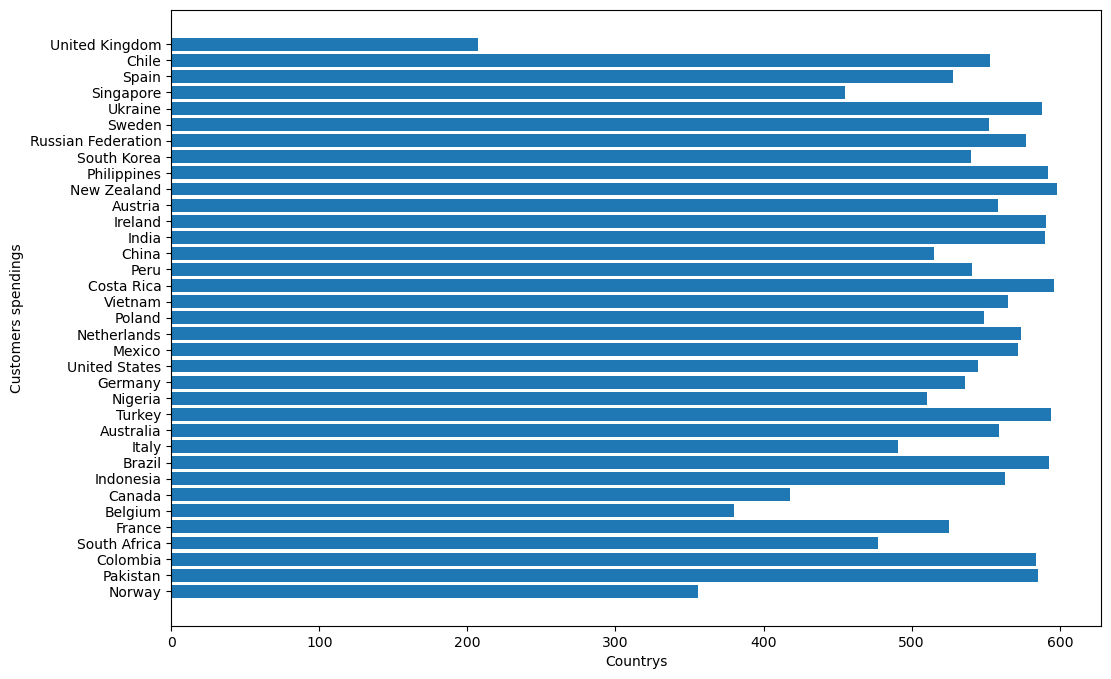

In [12]:
country = Sell4All_data['Country'].head(300)
customer_spendings = Sell4All_data['Customer spendings'].head(300)

plt.figure(figsize = (12, 8))

plt.barh(country, customer_spendings)

plt.xlabel('Countrys')
plt.ylabel('Customers spendings');

plt.show()

# Interprétation du graphique :

On constate qu'il y a des pays où les dépenses des clients sont très inférieures par rapport aux autres (moins de 400 €) par exemple (United Kingdom, Norway, Belgium).

Suppression de toutes les lignes d'utilisateurs ayant dépensé moins de 10 € sur le site :

In [13]:
Sell4All_data.drop(Sell4All_data.index[Sell4All_data['Customer spendings'] < 10])

,Name,Phone Number,Email,Address,Country,Postal code,Last date of connection,Last time of connection,Age,Gender,Customer spendings
0,Aaron Cote,966-7625,elit@hotmail.org,699-5837 Risus Street,Norway,4126,5-Apr-21,4:39,71,Man,356
1,Angelica Lawson,232-3051,diam.proin@google.org,481-8428 Magna. Street,Pakistan,518885,"oct. 10, 2021",0:36,37,Women,173
2,Louis Gilbert,1-997-733-0134,lorem.fringilla@hotmail.org,Ap #192-2082 Enim. Ave,Colombia,575444,2-Jul-22,3:37,24,Women,105
3,Basia Finley,1-987-322-7148,tristique.aliquet@icloud.co,608-2732 Nec Rd.,South Africa,5973-5765,19-Feb-22,2:34,37,Women,28
4,Rhona Sears,387-7682,iaculis.odio.nam@protonmail.org,8763 In Rd.,France,37476,31-Mar-22,6:28,42,Women,13
...,...,...,...,...,...,...,...,...,...,...,...
500,Abraham Walker,835-6185,nunc.sed.orci@outlook.net,"Ap #258-8540 A, St.",South Africa,3181-4474,31-Jan-23,13:46,28,Women,182
501,Drake Carney,891-0713,dignissim.pharetra@icloud.org,304-4217 Ac Street,France,54615,11-Jun-22,10:06,46,Women,25
502,Hadley Sykes,1-865-267-6254,luctus@icloud.com,"P.O. Box 851, 819 Pede. Av.",Peru,16373,13-Jun-22,18:49,43,Women,42
503,Dean Hensley,1-776-366-7784,dui@aol.com,"P.O. Box 896, 2956 Risus. Ave",China,746013,27-Aug-21,6:02,20,Women,511


Remarque : Ona 3 lignes dont la dépense du client est moins de 10 € sur le site.

Suppression de toutes les lignes qui apparaissent plus d’une fois dans les données :

In [14]:
Sell4All_data.drop_duplicates()

,Name,Phone Number,Email,Address,Country,Postal code,Last date of connection,Last time of connection,Age,Gender,Customer spendings
0,Aaron Cote,966-7625,elit@hotmail.org,699-5837 Risus Street,Norway,4126,5-Apr-21,4:39,71,Man,356
1,Angelica Lawson,232-3051,diam.proin@google.org,481-8428 Magna. Street,Pakistan,518885,"oct. 10, 2021",0:36,37,Women,173
2,Louis Gilbert,1-997-733-0134,lorem.fringilla@hotmail.org,Ap #192-2082 Enim. Ave,Colombia,575444,2-Jul-22,3:37,24,Women,105
3,Basia Finley,1-987-322-7148,tristique.aliquet@icloud.co,608-2732 Nec Rd.,South Africa,5973-5765,19-Feb-22,2:34,37,Women,28
4,Rhona Sears,387-7682,iaculis.odio.nam@protonmail.org,8763 In Rd.,France,37476,31-Mar-22,6:28,42,Women,13
...,...,...,...,...,...,...,...,...,...,...,...
500,Abraham Walker,835-6185,nunc.sed.orci@outlook.net,"Ap #258-8540 A, St.",South Africa,3181-4474,31-Jan-23,13:46,28,Women,182
501,Drake Carney,891-0713,dignissim.pharetra@icloud.org,304-4217 Ac Street,France,54615,11-Jun-22,10:06,46,Women,25
502,Hadley Sykes,1-865-267-6254,luctus@icloud.com,"P.O. Box 851, 819 Pede. Av.",Peru,16373,13-Jun-22,18:49,43,Women,42
503,Dean Hensley,1-776-366-7784,dui@aol.com,"P.O. Box 896, 2956 Risus. Ave",China,746013,27-Aug-21,6:02,20,Women,511


In [15]:
column_list = ['Country','Age','Gender','Customer spendings']

Sell4All_data.to_csv('Abdellah_Badou.csv', index=False, columns = column_list, sep='|')